# Implementation of Hypothesis Testing - P Value, Correlation, T Test

https://www.youtube.com/watch?v=4-rxTA_5_xA&list=PLE6KYAK0e5K0QfvPQ_SoMwjfKv-V1uaPt&index=3&t=251s

In [1]:
import numpy as np

## T Test

- A T-test is a inferential statistic which is used to determine if there is a significant difference between mean of two groups which are related.
- This two groups may be a population.

### Problem Statement:

If i take sample of two groups, and compute the mean of both, compare the means, Then Can i come to a conclusion that whether there is any signnificant difference b/w the population by just considering the mean?.

T test has 2 types: 
    
    1) One Sample T test
    
    2) Two Sample T test

### One Sample T test

This test tells us whether the mean of sample and population are different.

Image below formula given: 

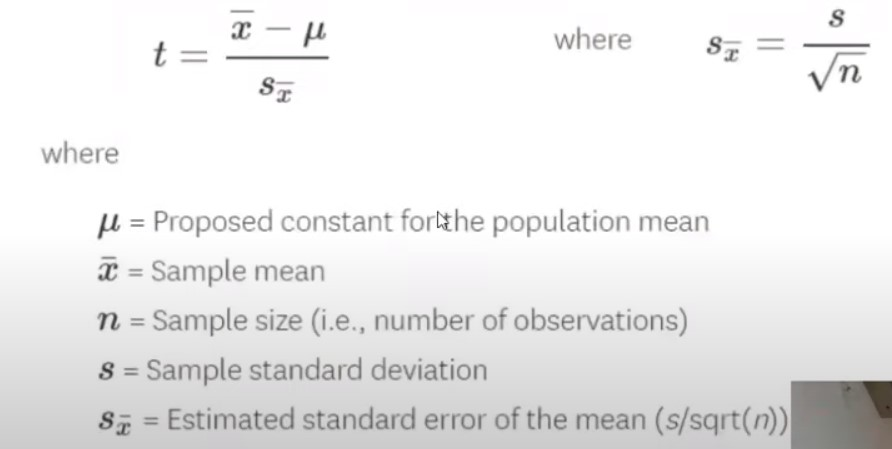

#### Consider an Example

Consider a class of students with respective ages

In [2]:
population_size=32
ages = np.random.randint(15, 25, 32)
ages

array([24, 17, 18, 22, 18, 22, 21, 16, 20, 21, 15, 22, 23, 23, 22, 23, 18,
       22, 16, 23, 18, 18, 15, 18, 19, 22, 23, 17, 21, 21, 20, 19])

In [3]:
# 1. Compute mean of age population
population_mean = np.mean(ages)
population_mean

19.90625

In [4]:
# 2. Take a sample of age population
sample_size = 10
sample_ages = np.random.choice(ages, sample_size)
sample_ages

array([21, 18, 22, 24, 24, 16, 23, 15, 20, 18])

### We need to know whether there is a significant difference b/w mean of population and sample. It can be evaluated using one sample t test

- For that we create an Alternate hypothesis(h1).

- Alternate Hypothesis (h1) says that *there is a difference*

- Null Hypothesis (h0) says that *there is no difference*

- We use one sample t-test to compute **P-Value**.

- If **P-Value** < 0.05, we reject NULL hypothesis (h0) & accept Alternate hypothesis(h1).

- import ttest_1samp function from stats library.
- **ttest_1samp** is used to Calculate the T-test for the mean of ONE group of scores.
- **ttest_1samp** gives two values:

    1) ttest Value
    
    2) P Value
- Pass sample and an expected value for population mean to **ttest_1samp** function.
- We consider a value in place of popmean.

In [13]:
from scipy.stats import ttest_1samp

In [33]:
# pass sample_ages array and popmean(expected value for population mean) as arguments
# Whether this popmean value is going to be 20 or not 20.
# if it is 20 we say that there is no difference which accept null hypothesis.
# if it is not 20, there is difference which accepts alternate hypothesis.
# we take this popmean as 20 since our population mean of age is 19.90

ttest, p_value = ttest_1samp(sample_ages, 20)

In [34]:
# print p value
p_value

0.9245556023999469

In [35]:
# print t test
ttest

0.0973841209741807

In [38]:
if p_value < 0.05:
    print('reject NULL Hypothesis')
else:
    print('reject Alternate Hypothesis')

reject Alternate Hypothesis


here we reject alternate hypothesis (h1) since **P-Value** is 0.92 and it is > 0.05.

### Some More Example

Consider the age of students in a college and in Class10. 

In [44]:
import pandas as pd
import scipy.stats as stats
import math

# create a population of ages

# In school more that 1500 people present 
# We consider a poisson distribution saying that age in that college starts
# from 18 and mean age of school as 35.

# loc - most LHS value.
# mu - mean age of people at school

# generate random numbers with minimum value as 18 and mean as 35 with a size of 1500.
school_ages = stats.poisson.rvs(loc=18, mu=35, size=1500)

# generate random numbers for a sample class 10 with min.value as 18, mean as 35, sample size=60.
class10_Ages = stats.poisson.rvs(loc=18, mu=30, size=60)

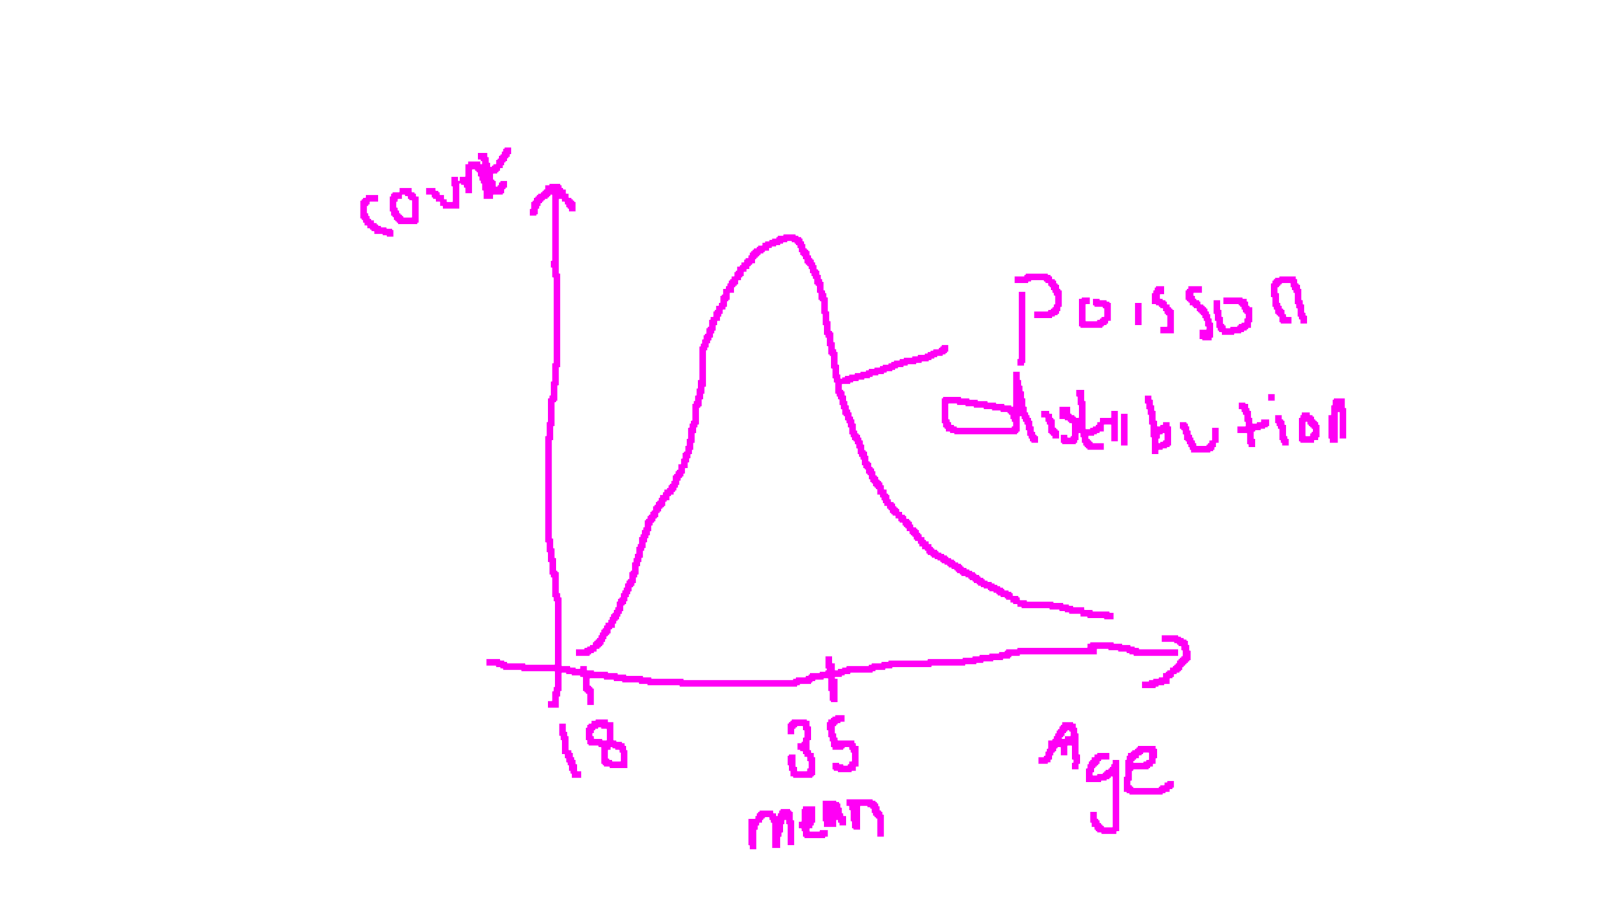

**Poisson Distribution** of School Ages looks like above.

In [41]:
school_ages

array([55, 57, 59, ..., 43, 55, 54])

In [45]:
class10_Ages

array([47, 59, 44, 51, 41, 48, 41, 45, 42, 49, 51, 57, 52, 50, 51, 51, 55,
       50, 56, 46, 47, 50, 57, 53, 45, 41, 38, 52, 48, 49, 51, 55, 47, 53,
       50, 45, 54, 49, 51, 46, 54, 50, 43, 49, 54, 53, 52, 46, 55, 55, 45,
       45, 44, 48, 46, 42, 37, 45, 47, 50])

In [46]:
# Compute mean of school ages population.

school_ages.mean()

52.909333333333336

In [59]:
# Compute mean of sample - class10_Ages

class10_Ages.mean()

48.78333333333333

In [60]:
# Compute P value, T test values - Pass sample (class 10 ages) and population mean (school ages mean)
# as arguments.

ttest, p_value = ttest_1samp(a=class10_Ages, popmean=school_ages.mean())

In [61]:
ttest

-6.584075705784205

In [62]:
p_value

1.3631468229833553e-08

In [63]:
# Check p value with 0.05
if p_value < 0.05:
    print('reject null hypothesis (h0)')
else:
    print('reject alternate hypothesis (h1)')

reject null hypothesis (h0)


**Conclusion:**
    
Since **P Value < 0.05**, we reject *null hypothesis* and accept *alternate hypothesis* (ie there is diffrence in mean age of sample and population). 

- NULL hypothesis(h0) says that **no difference in sample mean and poulation mean of age**.
- Alternate hypothesis(h1) says that **there is a difference in sample mean and poulation mean of age**.

In [ ]:
# time: 10: 50

### Two Sample T test with Python

The **independent sample t-test or two sample t-test** compares the means of two independent groups in order to determine whether is a significant difference in the population mean of those two independent groups.

this test is a parametric test.

also known as independent t test.

**alternate hypothesis (h1)** -> there is a significant difference in mean of two independent groups

**null hypothesis (h0)** -> there is no significant difference in mean of two independent groups

In [3]:
from scipy.stats import poisson, ttest_ind

In [16]:
# 1. Initialize class A height - First group
classA_height =poisson.rvs(loc=140, mu=120, size=50)

In [17]:
classA_height

array([255, 258, 264, 239, 271, 253, 267, 274, 242, 270, 270, 243, 258,
       271, 273, 280, 265, 255, 253, 258, 254, 244, 265, 257, 263, 278,
       288, 240, 230, 263, 258, 266, 257, 274, 267, 237, 262, 250, 243,
       253, 261, 241, 242, 253, 258, 264, 247, 249, 261, 255])

In [27]:
classA_height.mean()

257.98

In [18]:
# 2. Initialize class A ages - Second group
classA_ages = poisson.rvs(loc=18, mu=33, size=50)

In [20]:
classA_ages

array([59, 43, 50, 62, 49, 49, 50, 41, 55, 50, 53, 64, 48, 43, 52, 47, 50,
       48, 60, 54, 47, 46, 47, 60, 53, 38, 36, 54, 48, 51, 45, 51, 48, 48,
       46, 53, 59, 56, 45, 50, 48, 58, 44, 48, 49, 49, 42, 63, 46, 46])

In [26]:
classA_ages.mean()

50.02

In [30]:
# 3. Compute P value, T test values.
# Pass 2 independent groups as arguments to parameters 'a' and 'b' in ttest_ind()
ttest,p_values = ttest_ind(a=classA_height, b=classA_ages)

**ttest_ind()**

Calculate the T-test for the means of *two independent* samples of scores.

In [24]:
ttest

107.03846677894143

In [25]:
p_values

2.5173979386267406e-103

In [31]:
# Check P Value with 0.05
if p_values < 0.05:
    print('Reject Null Hypothesis')
else:
    print('reject Alternate hypothesis')

Reject Null Hypothesis


We can infer that, there is a signficant difference in the population mean of 2 independent groups.
Since it satisfy alternate hyopthesis (h1).

In [32]:
# time: 13: 15

### Paired T test with Python

When you want to check how different, the samples from the same group looks.
In such case, we go for a Paired T test.

In [16]:
from scipy.stats import norm, ttest_rel

In [2]:
import numpy as np

#### we choose weight as our group here.

In [3]:
# sample 1
weight1 = np.random.randint(25, 40, 15)
weight1

array([33, 32, 27, 30, 25, 26, 31, 34, 29, 34, 35, 26, 38, 36, 33])

#### After some years above weights are increased

In [4]:
# sample 2 - We add normal distribution to the previous weights
weight2 = weight1 + norm.rvs(scale=5, loc=1.5, size=15)

In [5]:
# wieghts are increased.
weight2

array([38.39501983, 35.28182983, 21.11818407, 36.8371053 , 19.25606117,
       26.78374696, 27.73419274, 29.458189  , 33.47098553, 27.77340851,
       33.98186729, 22.23298568, 35.39586343, 41.17416426, 34.61315793])

Now we have **weight1** and **weight2**.

Next check whether there is any significant difference b/w weight1 and weight2.

null hypothesis(h0) -> says that there is no difference in samples.

alternate hyothesies(h1) -> says that there is a difference in samples.

In such cases, we use **Paired T Test** since only sample values are changed, group remains the same.

#### make a dataframe of this weight1 and weight2 and it's difference

In [6]:
import pandas as pd

In [14]:
weights_df = pd.DataFrame({"Weight 1": weight1, "Weight 2": weight2, "Weight_Change": np.array(weight2-weight1)})

In [15]:
weights_df

,Weight 1,Weight 2,Weight_Change
0,33,38.395020,5.395020
1,32,35.281830,3.281830
2,27,21.118184,-5.881816
3,30,36.837105,6.837105
4,25,19.256061,-5.743939
5,26,26.783747,0.783747
6,31,27.734193,-3.265807
7,34,29.458189,-4.541811
8,29,33.470986,4.470986
9,34,27.773409,-6.226591


In [9]:
type(weight1)

numpy.ndarray

In [23]:
# use ttest_rel() since we use 2 related samples.
ttest_val,p_value = ttest_rel(a=weight1, b=weight2)

**ttest_rel() method definition**

Calculate the t-test on TWO RELATED samples of scores, a and b.

Here **weight1** and **weight2** are two related samples.

In [18]:
p_value

0.7615911682208878

In [19]:
ttest_val

0.30937727483581057

In [21]:
# check pvalue with 0.05
def check_pval():
    if p_value < 0.05:
        return 'We reject null hypothesis'
    else:
        return 'We reject alternate hypothesis'

In [22]:
print(check_pval())

We reject alternate hypothesis


So we accept **NULL Hypothesis(h0)** here because **p value > 0.05**.

Thus we can infer that there is no significant difference in both related samples; **weight1** and **weight2**.

### Correlation

In [24]:
# time: 16: 50

In [1]:
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# Apply correlation function on dataframe
# correlation values ranges from -1 to +1.

df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- Values that are nearer to 1 means features are highly correlated.
  
      Eg: correlation b/w petal_length and petal_width is the highest. their corr value is 0.96 or 96%.

- Values that are nearer to 0 means features are very less correlated.
    
      Eg: correlation b/w sepal_width and sepal_length is verl low. corr value os -0.11 or -11%.

- Negative values/negation means features are inversely correlated.
        
      Eg: correlation b/w petal_length & sepal_width is inverse. corr value is -0.42 or -42%.
      
This way we can infer that what all paramters are important when considering dependent and independent features. 

Correlation majorly used in feature selection as well

In [5]:
0.96*100

96.0

### Plotting Correlation

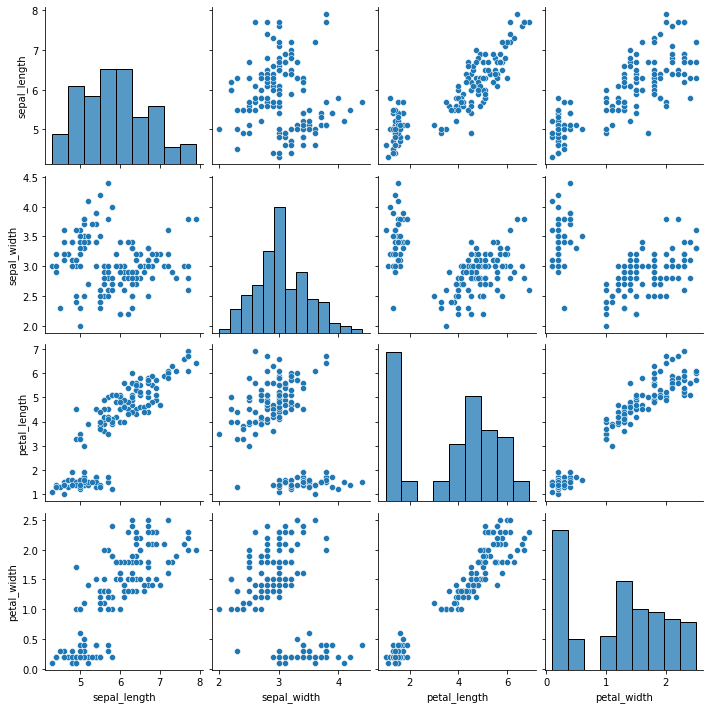

In [9]:
sns.pairplot(df)

**Inference**:

- From above plot, we can observe that correlation b/w **petal_length** and **petal_width** are very high since you can see  that datapoints are plotted linearly or in a straight line. Their correlated value is 1 or nearer to 1.

- We can observe that correlation b/w **petal_length** and **sepal_width** are inveresly correlated since you can see datapoints not fall linearly or in a straight line. Their correlated value is negative.

- We can observe that correlation b/w **sepal_width** and **sepal_length** are very less correlated or not correlated at all since you can see datapoints are scattered across the plot. Their correlated value is negative or nearer to 0.